## Spectral Signature
> + 高光谱分类数据集地物类别对应的光谱曲线图的绘制
> + 横轴可选择为波段数目
> + 竖轴表示光谱反射强度值

Please input dataset. ('IP', 'PU', 'SA', 'PC', 'KSC' datasets are available): IP
Selected dataset: IP
Load IP dataset successfully ✔
Class Number for IP is 16
Do u want to save the picture? Yes or No: No
It seems that u do not want to save this picture, see u next time!


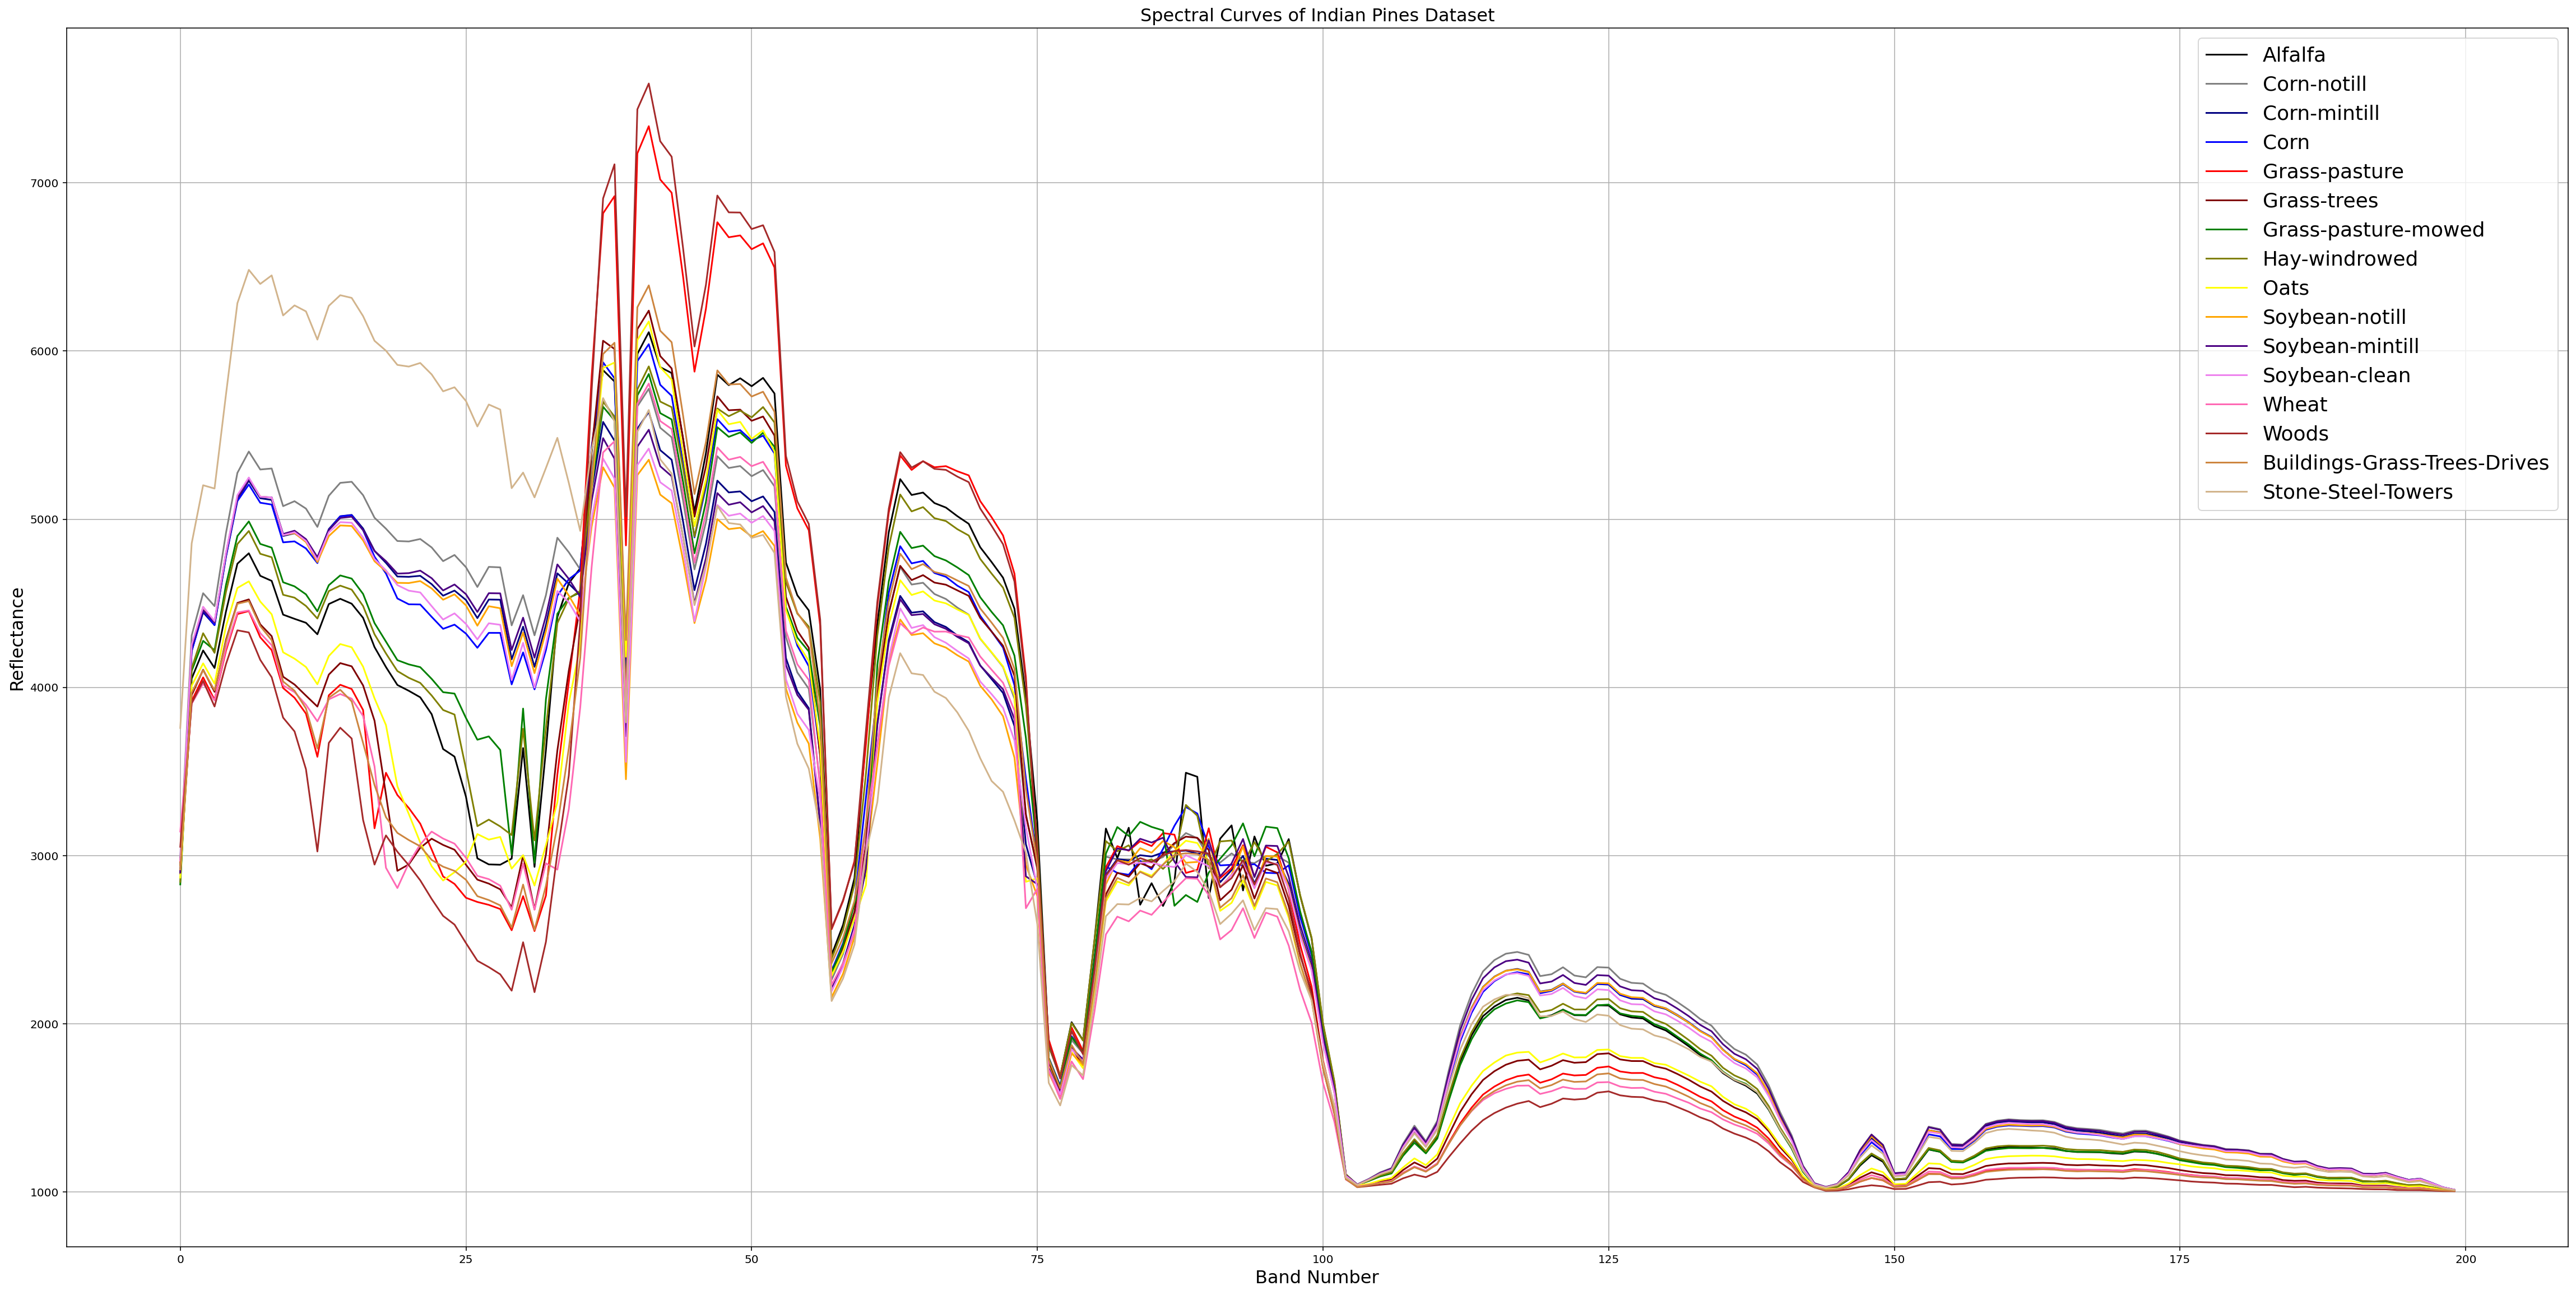

In [79]:
import numpy as np
import scipy.io as sio
import spectral
import matplotlib.pyplot as plt
import time


# 加载数据集

def loadDataSet(dataset):
    if dataset == 'IP':
        mydataset = sio.loadmat('./dataset/Indian_pines_corrected.mat')['indian_pines_corrected']
        mydataset_gt = sio.loadmat('./dataset/Indian_pines_gt.mat')['indian_pines_gt']
        classes = np.unique(mydataset_gt)[1:]
        class_num = len(classes)
        actual_class_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill','Corn', 'Grass-pasture',
                              'Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats',
                              'Soybean-notill','Soybean-mintill','Soybean-clean','Wheat',
                              'Woods','Buildings-Grass-Trees-Drives','Stone-Steel-Towers']
        print(f'Load {dataset} dataset successfully ✔\nClass Number for {dataset} is {class_num}') 
        
    if dataset == 'PU':
        mydataset = sio.loadmat('./dataset/PaviaU.mat')['paviaU']
        mydataset_gt = sio.loadmat('./dataset/PaviaU_gt.mat')['paviaU_gt']
        classes = np.unique(mydataset_gt)[1:]
        class_num = len(classes)
        actual_class_names = ['Asphalt', 'Meadows', 'Gravel','Trees', 'Painted metal sheets',
                              'Bare Soil','Bitumen','Self-Blocking Bricks','Shadows']
        print(f'Load {dataset} dataset successfully ✔\nClass Number for {dataset} is {class_num}') 
    
    if dataset == 'PC':
        mydataset = sio.loadmat('./dataset/Pavia.mat')['pavia']
        mydataset_gt = sio.loadmat('./dataset/Pavia_gt.mat')['pavia_gt']
        classes = np.unique(mydataset_gt)[1:]
        class_num = len(classes)
        actual_class_names = ['Water', 'Trees', 'Asphalt','Self-Blocking Bricks', 'Bitumen',
                              'Tiles','Shadows','Meadows','Bare Soil']
        print(f'Load {dataset} dataset successfully ✔\nClass Number for {dataset} is {class_num}')
        
    if dataset == 'SA':
        mydataset = sio.loadmat('./dataset/Salinas_corrected.mat')['salinas_corrected']
        mydataset_gt = sio.loadmat('./dataset/Salinas_gt.mat')['salinas_gt']
        classes = np.unique(mydataset_gt)[1:]
        class_num = len(classes)
        actual_class_names = ['Brocoli_green_weeds_1', 'Brocoli_green_weeds_2', 'Fallow', 'Fallow_rough_plow', 
                              'Fallow_smooth', 'Stubble','Celery', 'Grapes_untrained',
                              'Soil_vinyard_develop', 'Corn_senesced_green_weeds',
                              'Lettuce_romaine_4wk', 'Lettuce_romaine_5wk',
                              'Lettuce_romaine_6wk', 'Lettuce_romaine_7wk',
                              'Vinyard_untrained','Vinyard_vertical_trellis']
        print(f'Load {dataset} dataset successfully ✔\nClass Number for {dataset} is {class_num}') 
    
    if dataset == 'KSC':
        mydataset = sio.loadmat('./dataset/KSC.mat')['KSC']
        mydataset_gt = sio.loadmat('./dataset/KSC_gt.mat')['KSC_gt']
        classes = np.unique(mydataset_gt)[1:]
        class_num = len(classes)
        actual_class_names = ['Scrub', 'Willow swamp', 'CP hammock', 'CP/Oak', 
                              'Slash pine', 'Oak/Broadleaf','Hardwood swamp', 'Graminoid marsh',
                              'Spartina marsh', 'Catiail marsh',
                              'Salt marsh', 'Mud flats','Water']
        print(f'Load {dataset} dataset successfully ✔\nClass Number for {dataset} is {class_num}')
     
            
    return mydataset, mydataset_gt, classes, actual_class_names
        
# 定义每种地物类别的颜色
colors = ['black', 'gray', 'navy', 'blue', 'red', 'maroon', 'green', 'olive', 'yellow', 'orange', 'indigo', 'violet', 'hotpink', 'brown', 'peru', 'tan']


# 读取数据集，得到确定数据集、数据集地物类别数、数据集波长范围、实际地物名称
valid_datasets = ['IP', 'PU', 'SA', 'PC', 'KSC']
dataset = input("Please input dataset. ('IP', 'PU', 'SA', 'PC', 'KSC' datasets are available): ")

while dataset not in valid_datasets:
    print("Invalid dataset name. 'IP', 'PU', 'SA', 'PC' or 'KSC'.")
    dataset = input("Please input dataset. ('IP', 'PU', 'SA', 'PC', 'KSC' datasets are available): ")

print("Selected dataset:", dataset)

# 读取数据集
mydataset, mydataset_gt, classes, actual_class_names = loadDataSet(dataset)

# 显示的更高分辨率一些
%config InlineBackend.figure_format = 'retina'

# 创建一个大小为 (40, 20) 英寸的图表
fig = plt.figure(figsize=(40, 20))

# 绘制所有地物类别的光谱曲线
for i, cls in enumerate(classes):
    # 创建一个只包含该地物类别的掩码数组
    mask = mydataset_gt == cls
    
    # 计算该地物类别在数据集中的光谱曲线
    mean_spectrum = np.mean(mydataset[mask], axis=0)
    
    # 根据地物类别的颜色映射绘制光谱曲线
    plt.plot(mean_spectrum, color=colors[i])
    
# 设置图例
plt.legend(actual_class_names, fontsize=18)

# 设置图表标题、X 轴和 Y 轴标签
plt.title('Spectral Curves of Indian Pines Dataset', fontsize=16)
plt.xlabel('Band Number', fontsize=16)
plt.ylabel('Reflectance', fontsize=16)

# 显示网格线
plt.grid()

# 保存图像为高分辨率的 PNG 文件
valid_answer =  ['Yes', 'No']
save_flag = input('Do u want to save the picture? Yes or No: ')
while save_flag not in valid_answer:
    print("Invalid dataset name. Please input 'Yes' or 'No'.")
    save_flag = input('Do u want to save the picture? Yes or No: ')
if save_flag == 'Yes':
    unique_time = time.strftime("%Y%m%d-%H%M%S")
    fig.savefig(dataset + '_Spectral_Signature_' + unique_time + '.png' , dpi=300, bbox_inches='tight')
    print('Save succesfully ✔')
if save_flag == 'No':
    print('It seems that u do not want to save this picture, see u next time!')

# 显示图表
plt.show()
